In [1]:
print ('hello')

hello


In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
!python -m pip show plotly

Name: plotly
Version: 5.18.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: c:\Users\Oladimeji\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: packaging, tenacity
Required-by: 


In [10]:
data = pd.read_csv('kidney_disease.csv')
pd.set_option('display.max_columns', 500)
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


,red blood cells,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [28]:
def converter(data):
    data= pd.to_numeric(data, errors = 'coerce')
    return data

data['packed cell volume'] = converter(data['packed cell volume'])
data['white blood cell count'] = converter(data['white blood cell count'])
data['red blood cell count'] = converter(data['red blood cell count'])

In [29]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


,red blood cells,pus cell,pus cell clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


<hr><br><b>Data Preprocessing<br> <hr>

In [30]:
df = data.copy()

from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for i in cat:
    if i in df:
        df[i] = label_encode.fit_transform(df[i])
df

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,3,1,0,0,0,2


<hr> <br> Feauture Selection <hr> <br>

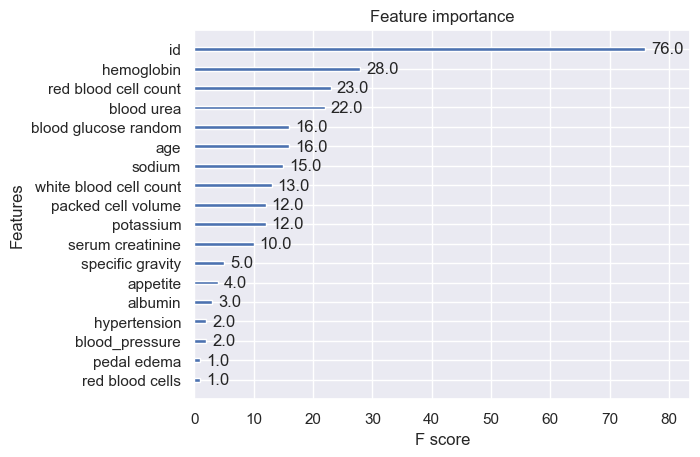

In [31]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('classes', axis = 1)
y = df.classes

model.fit(x, y)

# plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [40]:
sel_cols = ['blood urea', 'hemoglobin', 'red blood cell count', 'age', 'white blood cell count', 'blood glucose random', 'sodium', 'classes']
sel_data = df[sel_cols]
sel_data

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,blood glucose random,sodium,classes
0,36.0,15.4,5.2,48.0,7800.0,121.0,NaN,0
1,18.0,11.3,NaN,7.0,6000.0,NaN,NaN,0
2,53.0,9.6,NaN,62.0,7500.0,423.0,NaN,0
3,56.0,11.2,3.9,48.0,6700.0,117.0,111.0,0
4,26.0,11.6,4.6,51.0,7300.0,106.0,NaN,0
...,...,...,...,...,...,...,...,...
395,49.0,15.7,4.9,55.0,6700.0,140.0,150.0,2
396,31.0,16.5,6.2,42.0,7800.0,75.0,141.0,2
397,26.0,15.8,5.4,12.0,6600.0,100.0,137.0,2
398,50.0,14.2,5.9,17.0,7200.0,114.0,135.0,2


In [41]:
import warnings
warnings.filterwarnings('ignore')
sel_data.dropna(inplace = True)
sel_data.shape

(219, 8)

<Axes: xlabel='classes', ylabel='count'>

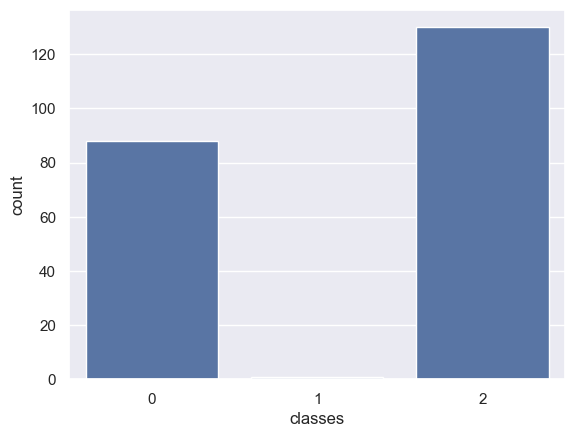

In [42]:
sns.set(style = 'darkgrid')
sns.countplot(x = sel_data.classes)

<Axes: xlabel='classes', ylabel='count'>

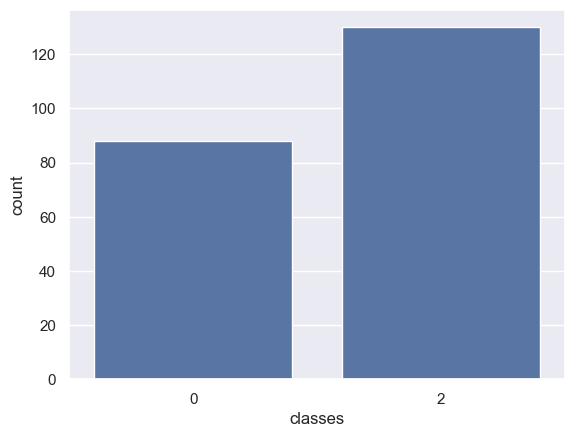

In [43]:
sel_data = sel_data.loc[sel_data['classes'] != 1]
sns.countplot(x = sel_data.classes)

In [44]:
# Split Into Train and Test
x = sel_data.drop('classes', axis = 1)
y = sel_data.classes

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0, stratify = y)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

rf_model.fit(xtrain, ytrain)
cross_val = print(classification_report(rf_model.predict(xtrain), ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           2       1.00      1.00      1.00       104

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



In [46]:
print(classification_report(rf_model.predict(xtest), ytest))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           2       1.00      0.96      0.98        27

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



In [ ]:
x